In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_palette("husl")



In [4]:
df_customers = pd.read_csv('http://www.ishelp.info/data/bikebuyers.csv')
df_customers.to_json('bicicletas.json', orient='records')
from google.colab import files
files.download("bicicletas.json")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_customers.to_json()

In [ ]:
df_customers.head(3)

,ID,Marital Status,Gender,MaritalStatusNumeric,GenderNumeric,Income,Children,EducationNumeric,CommuteDistanceNumeric,Cars,Age,HomeOwnerNumeric,PurchaseBikeNumeric,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
0,19147,Married,Male,1,0,40000,0,4,1,1,42,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
1,22296,Married,Male,1,0,70000,0,4,1,1,38,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
2,25983,Married,Male,1,0,70000,0,4,1,1,43,0,0,Bachelors,Professional,No,0-1 Miles,North America,No


In [ ]:
df_customers['Education'].unique()

array(['Bachelors', 'Graduate Degree', 'High School', 'Partial College',
       'Partial High School'], dtype=object)

In [ ]:
df_customers['education_rank'] = df_customers['Education']
replace_dict = {
    'Partial High School': 1,
    'High School': 2,
    'Partial College': 3,
    'Bachelors': 4, 
    'Graduate Degree': 5
}
df_customers['education_rank'] = df_customers['education_rank'].replace(replace_dict)

In [ ]:
df_customers['education_rank']
df_customers['education_rank'] = df_customers['education_rank'].astype('int64')

In [ ]:
original_cat = df_customers['Commute Distance'].unique()

In [ ]:
df_customers['commute_rank'] = df_customers['Commute Distance']
df_customers['commute_rank'] = df_customers['commute_rank'].replace(original_cat, [0,1,2,5,10])
df_customers['commute_rank'] = df_customers['commute_rank'].astype('int64')

In [ ]:
df_customers['Purchased Bike'] = df_customers['Purchased Bike'].replace(['Yes', 'No'], [0,1])
df_customers['Purchased Bike'] = df_customers['Purchased Bike'].astype('int64')

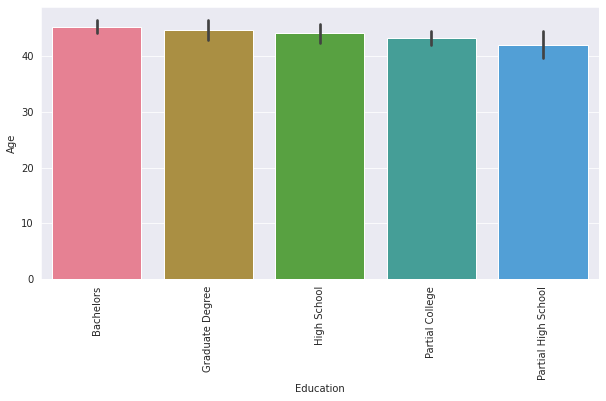

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=df_customers, x="Education",y="Age")
ax.set_xticklabels(ax.get_xticklabels() ,rotation=90)
plt.show()

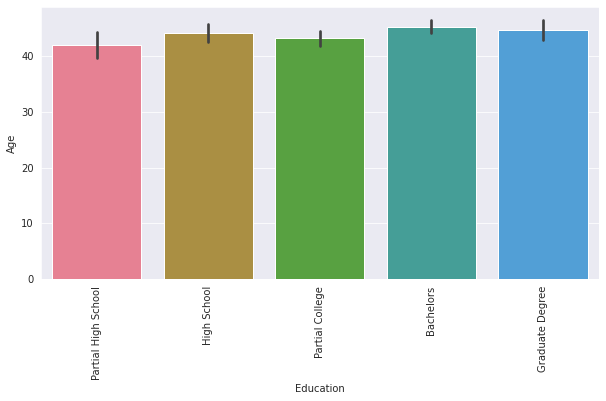

' \nSe puede especificar el orden utilizando los metodos sort y sorted. \nejemplo: order=sorted(replace_dict.keys()) ordena alfabeticamente. ,reverse=True regresa el orden\ninverso. sort es igual a sorted pero sort modifica la lista y regresa none, sorted regresa una nueva lista.\n'

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=df_customers,
                 x="Education",
                 y="Age",
                 order=replace_dict.keys())
ax.set_xticklabels(ax.get_xticklabels() ,rotation=90)
plt.show()

''' 
Se puede especificar el orden utilizando los metodos sort y sorted. 
ejemplo: order=sorted(replace_dict.keys()) ordena alfabeticamente. ,reverse=True regresa el orden
inverso. sort es igual a sorted pero sort modifica la lista y regresa none, sorted regresa una nueva lista.
''' 


In [ ]:
print(list(replace_dict.keys()))

['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree']


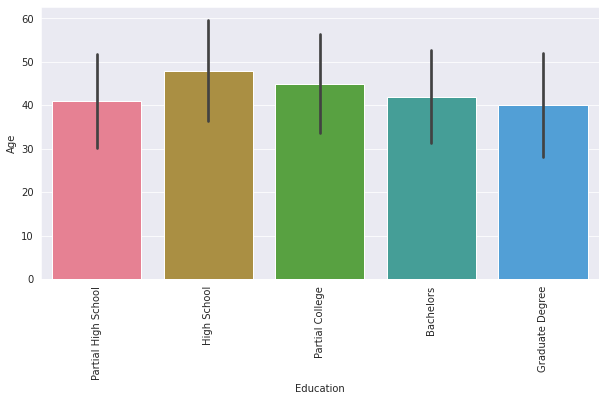

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=df_customers,
                 x="Education",
                 y="Age",
                 order=replace_dict.keys(),
                 estimator=np.median,
                 #errorbar en versiones mas recientes
                 ci='sd')
ax.set_xticklabels(ax.get_xticklabels() ,rotation=90)
plt.show()

### estimator = np.max, np.min, np.median,
### visualizamos la varianza de las medias al mostrar las lineas de error

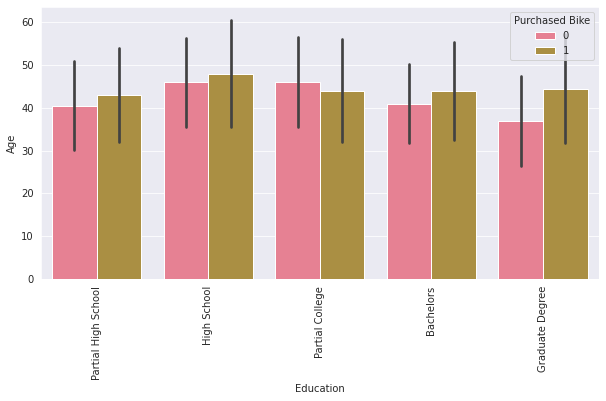

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=df_customers,
                 x="Education",
                 y="Age",
                 order=replace_dict.keys(),
                 estimator=np.median,
                 #errorbar en versiones mas recientes
                 ci='sd',
                 hue="Purchased Bike")
ax.set_xticklabels(ax.get_xticklabels() ,rotation=90)
plt.show()


<Figure size 720x360 with 0 Axes>

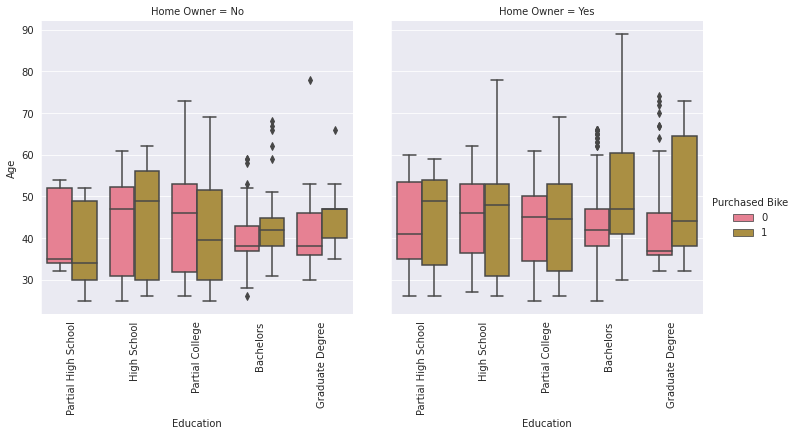

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.catplot(data=df_customers,
                 x="Education",
                 y="Age",
                 order=replace_dict.keys(),
                 estimator=np.median,
                 #errorbar en versiones mas recientes
                 ci='sd',
                 hue="Purchased Bike",
                 col="Home Owner",
                 kind="box")
ax.set_xticklabels(rotation=90)
plt.show()


In [ ]:
from scipy import stats
df_customers_by_education = df_customers.groupby('Education')['Purchased Bike']
groups = [df_customers_by_education.get_group(x) for x in df_customers_by_education.groups]

f_value, p_value = stats.f_oneway(*groups)
print("Resultados ANOVA:\n F: ",f_value, "\n p: " + str(p_value))

Resultados ANOVA:
 F:  6.465288388710145 
 p: 3.8877233994112315e-05


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(df_customers['Purchased Bike'], df_customers['Education'])
print(tukey)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1            group2       meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------
      Bachelors     Graduate Degree   0.0121    0.9 -0.1163 0.1404  False
      Bachelors         High School   0.1109 0.1206 -0.0162 0.2381  False
      Bachelors     Partial College   0.1032 0.0941 -0.0102 0.2166  False
      Bachelors Partial High School   0.2891  0.001  0.1159 0.4623   True
Graduate Degree         High School   0.0989 0.3296  -0.045 0.2428  False
Graduate Degree     Partial College   0.0912 0.3235 -0.0407  0.223  False
Graduate Degree Partial High School   0.2771  0.001  0.0913 0.4629   True
    High School     Partial College  -0.0077    0.9 -0.1385  0.123  False
    High School Partial High School   0.1782 0.0656 -0.0068 0.3632  False
Partial College Partial High School   0.1859 0.0322  0.0101 0.3617   True
--------------------------------------